In [1]:
# Load relevant R packages
inLibraries = list('repr','rgdal','rgeos')

for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

Warning message:
"package 'rgdal' was built under R version 3.4.2"Warning message:
"package 'sp' was built under R version 3.4.2"Warning message:
"package 'rgeos' was built under R version 3.4.2"

In [2]:
ppolys <- readOGR("datasets/county_warning_areas", "CWA_albers")

OGR data source with driver: ESRI Shapefile 
Source: "datasets/county_warning_areas", layer: "CWA_albers"
with 116 features
It has 10 fields


In [3]:
names(ppolys)

[1] "CWA"       "WFO"       "LON"       "LAT"       "Region"    "FullStaId"
 [7] "CityState" "City"      "State"     "ST"

In [4]:
head(ppolys@data)

,CWA,WFO,LON,LAT,Region,FullStaId,CityState,City,State,ST
0,ABQ,ABQ,-106.01661,35.11254,SR,KABQ,Albuquerque NM,Albuquerque,New Mexico,NM
1,ABR,ABR,-99.15787,45.05594,CR,KABR,Aberdeen SD,Aberdeen,South Dakota,SD
2,AKQ,AKQ,-77.04384,37.23562,ER,KAKQ,Wakefield VA,Wakefield,Virginia,VA
3,ALY,ALY,-73.92112,42.81402,ER,KALY,Albany NY,Albany,New York,NY
4,AMA,AMA,-101.51643,35.86965,SR,KAMA,Amarillo TX,Amarillo,Texas,TX
5,APX,APX,-84.66401,45.01240,CR,KAPX,Gaylord MI,Gaylord,Michigan,MI


In [5]:
summary(ppolys)

Object of class SpatialPolygonsDataFrame
Coordinates:
         min     max
x -2356113.7 2258225
y   269278.4 3172577
Is projected: TRUE 
proj4string :
[+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=23 +lon_0=-96 +x_0=0 +y_0=0
+datum=NAD83 +units=m +no_defs +ellps=GRS80 +towgs84=0,0,0]
Data attributes:
      CWA           WFO           LON               LAT        Region 
 ABQ    :  1   ABQ    :  1   Min.   :-123.51   Min.   :24.84   CR:38  
 ABR    :  1   ABR    :  1   1st Qu.:-104.68   1st Qu.:34.71   ER:23  
 AKQ    :  1   AKQ    :  1   Median : -93.40   Median :39.07   SR:31  
 ALY    :  1   ALY    :  1   Mean   : -95.00   Mean   :38.43   WR:24  
 AMA    :  1   AMA    :  1   3rd Qu.: -83.68   3rd Qu.:42.85          
 APX    :  1   APX    :  1   Max.   : -68.67   Max.   :47.86          
 (Other):110   (Other):110                                            
   FullStaId                        CityState            City    
 KABQ   :  1   Aberdeen SD               :  1   Charleston :  2  
 K

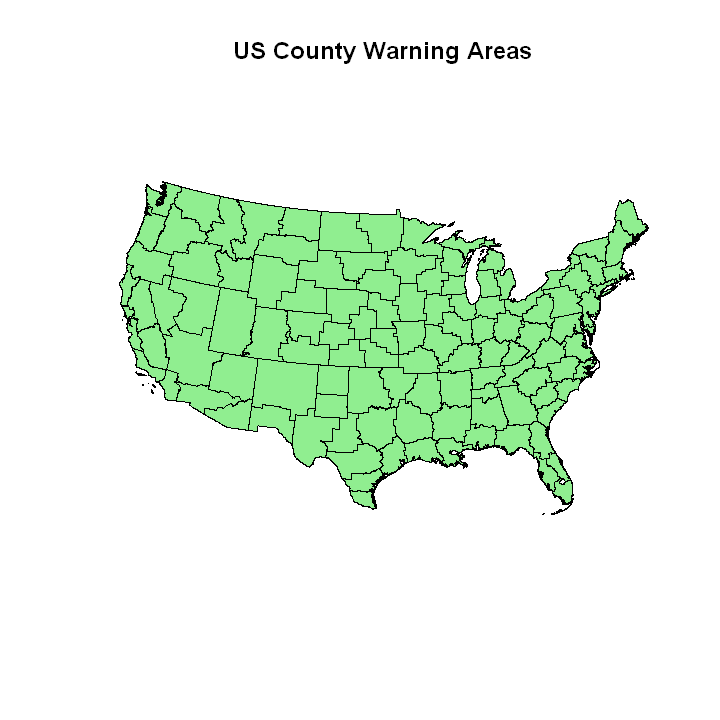

In [8]:
plot(ppolys, col = "lightgreen", main = "US County Warning Areas")

In [9]:
# get controid of polygons
centroids <- gCentroid(ppolys, byid = TRUE)
head(centroids)

SpatialPoints:
          x       y
0 -903566.6 1386893
1 -248798.0 2456262
2 1654734.0 1742395
3 1779565.4 2408968
4 -493426.3 1438262
5  890479.3 2499501
Coordinate Reference System (CRS) arguments: +proj=aea +lat_1=29.5
+lat_2=45.5 +lat_0=23 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m
+no_defs +ellps=GRS80 +towgs84=0,0,0 

In [16]:
centroidLons <- coordinates(centroids)[,1]
head(centroidLons)

0         1         2         3         4         5 
-903566.6 -248798.0 1654734.0 1779565.4 -493426.3  890479.3

In [17]:
centroidLats <- coordinates(centroids)[,2]
head(centroidLats)

0       1       2       3       4       5 
1386893 2456262 1742395 2408968 1438262 2499501

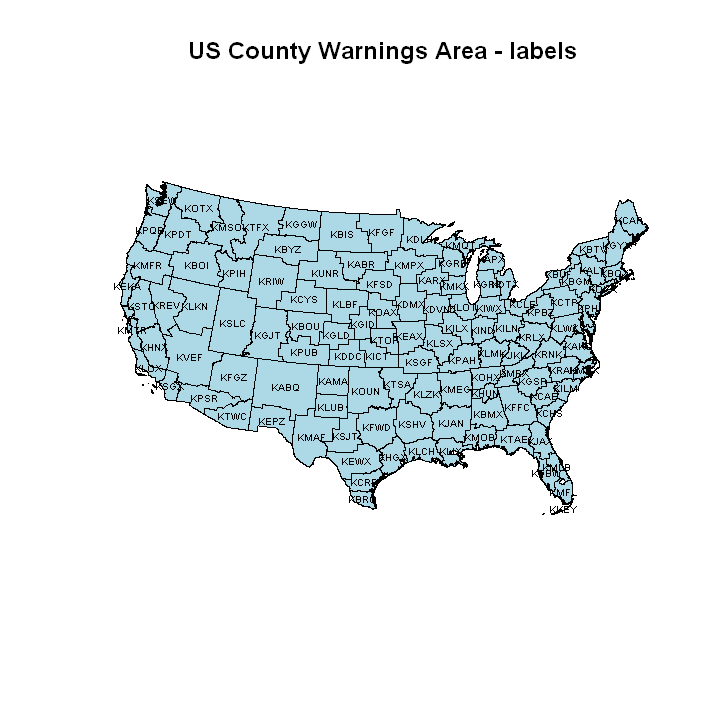

In [19]:
# labelling
plot(ppolys, col = "lightblue", main = "US County Warnings Area - labels")
text(centroidLons, centroidLats, labels = ppolys$FullStaId, cex = 0.5)

In [20]:
ppolys$FullStaId

[1] KABQ KABR KAKQ KALY KAMA KAPX KARX KBGM KBIS KBMX KBOI KBOU KBOX KBRO KBTV
 [16] KBUF KCAE KCAR KCHS KCLE KCRP KCTP KCYS KDDC KDLH KDMX KDTX KDVN KEAX KEKA
 [31] KEPZ KEWX KFFC KFGF KFGZ KFSD KFWD KGGW KGID KGJT KGLD KGRB KGRR KGSP KGYX
 [46] KHGX KHNX KHUN KICT KILM KILN KILX KIND KIWX KJAN KJAX KJKL KKEY KLBF KLCH
 [61] KLIX KLKN KLMK KLOT KLOX KLSX KLUB KLWX KLZK KMAF KMEG KMFL KMFR KMHX KMKX
 [76] KMLB KMOB KMPX KMQT KMRX KMSO KMTR KOAX KOHX KOKX KOTX KOUN KPAH KPBZ KPDT
 [91] KPHI KPQR KPSR KPUB KRAH KREV KRLX KRNK KSEW KSGF KSGX KSHV KSJT KSLC KSTO
[106] KTAE KTBW KTOP KTSA KTWC KUNR KVEF KTFX KBYZ KPIH KRIW
116 Levels: KABQ KABR KAKQ KALY KAMA KAPX KARX KBGM KBIS KBMX KBOI KBOU ... KVEF

## Selecting features within a feature class

In [21]:
ppolys@data$Region

[1] SR CR ER ER SR CR CR ER CR SR WR CR ER SR ER ER ER ER ER ER SR ER CR CR CR
 [26] CR CR CR CR WR SR SR SR CR WR CR SR WR CR CR CR CR CR ER ER SR WR SR CR ER
 [51] ER CR CR CR SR SR CR SR CR SR SR WR CR CR WR CR SR ER SR SR SR SR WR ER CR
 [76] SR SR CR CR SR WR WR CR SR ER WR SR CR ER WR ER WR WR CR ER WR ER ER WR CR
[101] WR SR SR WR WR SR SR CR SR WR CR WR WR WR WR CR
Levels: CR ER SR WR

In [22]:
# select subset of polygons
subregion <- "CR"
ppolySubset <- ppolys[ppolys@data$Region == subregion, ]

summary(ppolySubset)

Object of class SpatialPolygonsDataFrame
Coordinates:
       min     max
x -1309413 1223857
y  1495587 2931126
Is projected: TRUE 
proj4string :
[+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=23 +lon_0=-96 +x_0=0 +y_0=0
+datum=NAD83 +units=m +no_defs +ellps=GRS80 +towgs84=0,0,0]
Data attributes:
      CWA          WFO          LON               LAT        Region 
 ABR    : 1   ABR    : 1   Min.   :-108.79   Min.   :37.39   CR:38  
 APX    : 1   APX    : 1   1st Qu.: -99.91   1st Qu.:39.22   ER: 0  
 ARX    : 1   ARX    : 1   Median : -93.78   Median :41.50   SR: 0  
 BIS    : 1   BIS    : 1   Mean   : -94.38   Mean   :41.67   WR: 0  
 BOU    : 1   BOU    : 1   3rd Qu.: -88.76   3rd Qu.:43.71          
 CYS    : 1   CYS    : 1   Max.   : -83.51   Max.   :47.66          
 (Other):32   (Other):32                                            
   FullStaId          CityState          City         State          ST    
 KABR   : 1   Aberdeen SD  : 1   Aberdeen  : 1   Kansas  : 4   KS     : 4  
 KAP

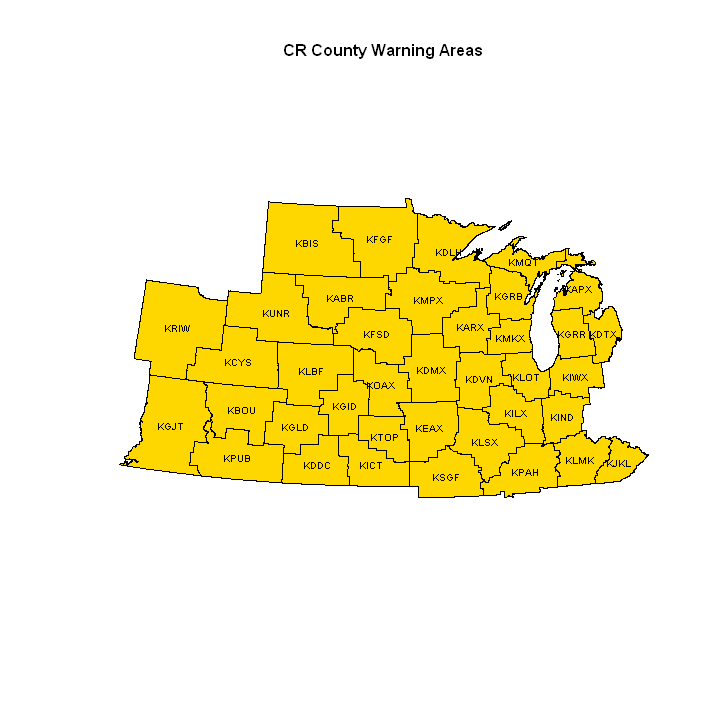

In [25]:
plot(ppolySubset, col = "gold", 
                     main = paste(subregion, "County Warning Areas", sep = " "),
                     cex.main = 0.8)

# get centroid of polygons
centroids <- gCentroid(ppolySubset, byid = TRUE)
centroidLons <- coordinates(centroids)[, 1]
centroidLats <- coordinates(centroids)[, 2]

# add labels to map
text(centroidLons, centroidLats, labels = ppolySubset$FullStaId, cex = 0.5)